 ## Лабораторная работа

# Решение краевых задач методом разностных аппроксимаций

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 1. *Задаем значения граничных условий, параметра k, точности $\epsilon$, количества отрезков n, на которое разбиваем ось x:*

In [2]:
k = 1
n = 5000
eps = 0.001
a = -1 + eps
b = 1 + eps
ya = 0
yb = 0

### 2. *Задаем функции g, u, f, p (параметры power и task определяют выполняемое задание и определяют функции в соответствии с ним)*:

In [3]:
def g(x, power, task):
    if task:
        if math.sin(k * x ** power) == 0:
            return math.sin(k * (x + 0.0001) ** power)
        return math.sin(k * x ** power)
    else:
        return 1


def u(x, power, task):
    if task:
        return math.cos(k * x ** power)
    else:
        return 1


def f(x, power, task):
    return -1 / g(x, power, task)


def p(x, power, task):
    return -(1 + x * x * u(x, power, task)) / g(x, power, task)

### 3. *Для решения краевых задач в рамках разрабатываемого алгоритма вводятся следующие функции:*

#### 1. *Функция решения системы методом прогонки.*
*Для решения системы, получаемой в результате построения конечно-разностных аппроксимаций, можно использовать метод прогонки. Он основан на предположении о том, что все искомые значения связаны реккурентным соотношением: $x_i = \alpha_{i+1}\cdot x_{i+1} + \beta_{i+1}$, где $i = n-1, n-2, ..., 1$.*

*Система уравнений представляется в виде $a_i \cdot x_{i-1} + b_i\cdot x_i + c_i\cdot x_{i+1} = d_{i}$.
Тогда, выразив $x_{i-1}$ и $x_i$ через $x_{i+1}$ и подставив их в систему, видно, что:*

$\alpha_{i+1} = \dfrac {-c_i}{a_i \cdot \alpha_i + b_i}$

$\beta_{i+1} = \dfrac {d_i - a_i\cdot \beta_i}{a_i \cdot \alpha_i + b_i}$

*Итак, после нахождения прогоночных коэффициентов получаем решение системы, причем:*

$x_i = \alpha_{i+1}\cdot x_{i+1} + \beta_{i+1}$, где $i = n-1, n-2, ..., 1$.

$x_n = \dfrac {d_n - a_n\cdot \beta_n}{a_n \cdot \alpha_n + b_n}$

In [4]:
def solve_system(T, P):
    alpha = np.zeros(T.shape[0])
    beta = np.zeros(T.shape[0])
    X = np.zeros(T.shape[0])
    for i in range(T.shape[0]):
        a = b = c = 0
        if i > 0:
            a = T[i][0]
        b = T[i][1]
        if i + 1 < T.shape[0]:
            c = T[i][2]
        d = P[i]

        gamma = b + a * alpha[i - 1]
        alpha[i] = -c / gamma
        beta[i] = (d - a * beta[i - 1]) / gamma

    X[-1] = beta[-1]
    for i in range(T.shape[0] - 2, -1, -1):
        X[i] = alpha[i] * X[i + 1] + beta[i]
    return X

#### 2. *Функция для получения системы, решение которой дает приближенное решение краевой задачи:*

 *Определим вид получаемой в результате построения конечно-разностных аппроксимаций системы:*

$y'' - p(x)\cdot y = f(x) $

$y''_k = \dfrac{y_{k-1} - 2\cdot y_k + y_{k+1}}{h^2}$

$y_{k-1} - (2 + h^2\cdot p(x))\cdot y_k + y_{k+1} = h^2 \cdot f(x_k), k \in [1, n-1]$

*В соответствии с этим формируем матрицу для полученной системы:*

In [5]:
def solve(h, power = 0, task = False):
    n = round((b - a) / h)
    X = np.arange(a, b + h, h)
    H = np.full(n - 1, h ** 2, dtype=np.float)
    for i in range(H.shape[0]):
        H[i] *= f(X[i + 1], power, task)
    H[0] -= ya
    H[-1] -= yb

    M = np.zeros((n - 1, 3), dtype=np.float)

    for i in range(n - 1):
        M[i][1] = -(2 + h ** 2 * p(X[i + 1], power, task))
        if i - 1 >= 0:
            M[i][0] = 1
        if i + 1 < n - 1:
            M[i][2] = 1

    return np.hstack([np.hstack([ya, solve_system(M, H)]), yb]), X

#### 3. *Функция для достижения при решении системы заданной точности путем корректирования шага и для вывода графика полученного решения:*

In [20]:
def solve_with_defined_accuracy(power = 0, task = False):
    h = (b - a) / n
    while True:
        Y1, X1 = solve(h, power, task)
        Y2, X2 = solve(h / 2, power, task)
        max_diff = 0
        for i in range(Y1.shape[0]):
            max_diff = max(abs(Y1[i] - Y2[2 * i]), max_diff)
        if max_diff < eps:
            break
        h /= 2
    print("h = ", h)
    Y, X = solve(h, power, task)
    print("Ymax = ", max(Y), "\nYmin = ", min(Y))
    plt.plot(X, Y, color='red')
    plt.grid(True)
    plt.show()

In [21]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) # задаем формат вывода значений

# *Задание 1.*
    y'' + (1 + x²)y = -1,
    -1 ≤ x ≤ 1
    y(-1) = 0,
    y(1) = 0

h =  0.004
Ymax =  0.9320569364498029 
Ymin =  0.0


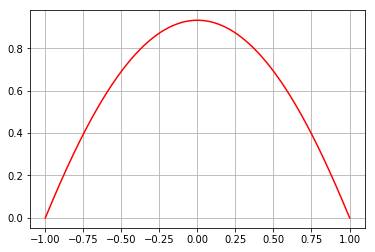

In [22]:
solve_with_defined_accuracy()

# *Задание 2.*
    ay'' + (1 + bx²)y = -1,
    -1 ≤ x ≤ 1
    y(-1) = 0,
    y(1) = 0,
    k = 1, a = sin(k), b = cos(k)

h =  0.004
Ymax =  1.242613439703166 
Ymin =  0.0


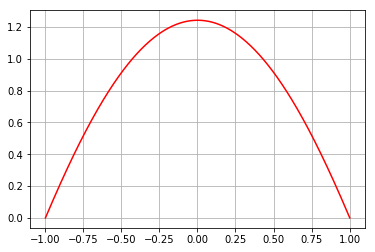

In [23]:
solve_with_defined_accuracy(0, True)

# *Задание 3.*
    ay'' + (1 + bx²)y = -1,
    -1 ≤ x ≤ 1
    y(-1) = 0,
    y(1) = 0,
    k = 1, a = sin(kx), b = cos(kx)

h =  0.001
Ymax =  0.0 
Ymin =  -1.000000000002093


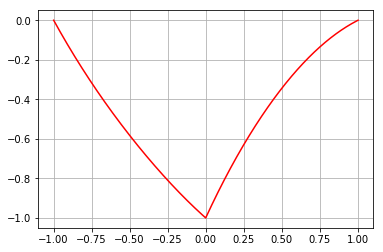

In [24]:
solve_with_defined_accuracy(1, True)

## *Исследование сходимости для заданий 1 и 2:*

### *Задание 1:*

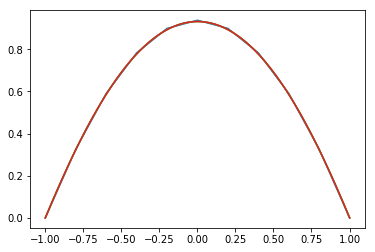

In [11]:
n_list = [10, 50, 100, 500]
for n in n_list:
    Y, X = solve((b - a) / n, 0, False)
    plt.plot(X, Y)
plt.show()

### *Задание 2:*

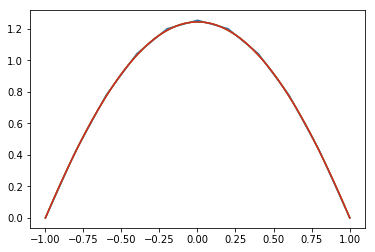

In [12]:
n_list = [10, 50, 100, 500]
for n in n_list:
    Y, X = solve((b - a) / n, 0, True)
    plt.plot(X, Y)
plt.show()